<a href="https://colab.research.google.com/github/aimee-annabelle/Probability_distribution_ML_assignment/blob/main/Probability_distribution_ML_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability distribution and gradient descent

### Part 1: Probability distribution

#### Scenario

You are a data analyst at a busy coffee shop in a business district. The shop manager needs help with staff scheduling and inventory planning. They want to understand the pattern of customer arrivals during weekday business hours (9 AM - 5 PM).
Historical data shows that the shop receives an average of 15 customers per hour, but this number varies throughout the day. The manager wants to:

- Predict how many customers might arrive in any given hour
- Understand the probability of getting different numbers of customers
- Use this information to optimize staff scheduling

Using the Poisson distribution:
a) Simulate customer arrivals for 100 business hours
b) Visualize the distribution of customer arrivals
c) Compare the actual distribution with the theoretical Poisson distribution
d) Analyze how this helps in staff scheduling decisions


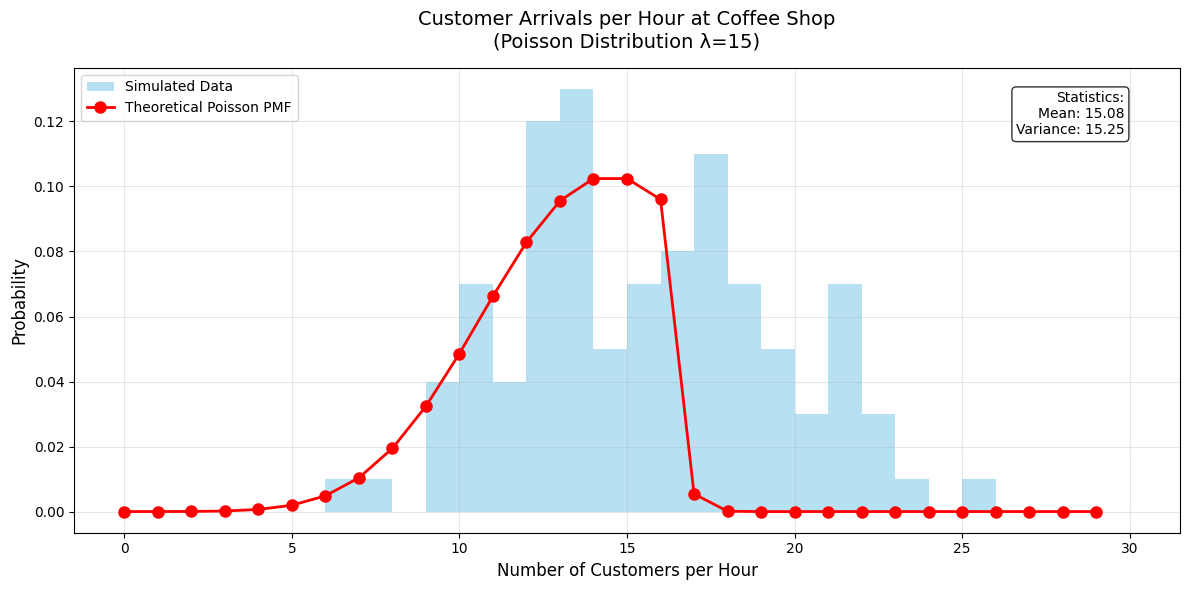


Probability of specific events:
Probability of exactly 15 customers: 0.102
Probability of 10 or fewer customers: 0.118
Probability of more than 20 customers: 0.330


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Parameters
lambda_param = 15  # Average number of customers per hour
num_samples = 100  # Number of simulations
max_k = 30  # Maximum number of customers to consider

# Generate Poisson distributed samples
samples = np.random.poisson(lambda_param, num_samples)

# Calculate theoretical Poisson probabilities
k = np.arange(0, max_k)
poisson_pmf = (lambda_param**k * np.exp(-lambda_param)) / np.array([np.prod(range(1, i+1)) if i > 0 else 1 for i in k])

# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram of simulated data
plt.hist(samples, bins=range(max_k + 1), density=True, alpha=0.6,
         color='skyblue', label='Simulated Data')

# Plot theoretical Poisson PMF
plt.plot(k, poisson_pmf, 'ro-', label='Theoretical Poisson PMF',
         linewidth=2, markersize=8)

# Customize the plot
plt.title('Customer Arrivals per Hour at Coffee Shop\n(Poisson Distribution λ=15)',
         fontsize=14, pad=15)
plt.xlabel('Number of Customers per Hour', fontsize=12)
plt.ylabel('Probability', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

# Add text box with key statistics
mean_customers = np.mean(samples)
variance = np.var(samples)
stats_text = f'Statistics:\nMean: {mean_customers:.2f}\nVariance: {variance:.2f}'
plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
         verticalalignment='top', horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print some probabilities for specific scenarios
print("\nProbability of specific events:")
print(f"Probability of exactly 15 customers: {poisson_pmf[15]:.3f}")
print(f"Probability of 10 or fewer customers: {np.sum(poisson_pmf[:11]):.3f}")
print(f"Probability of more than 20 customers: {1 - np.sum(poisson_pmf[:21]):.3f}")

#### Report Insights

1. *How does the distribution you were allocated vary from the other three you were not allocated*

2. *Would the question you chose be used in the context of a different distribution?*

### Part 2: Bayesian Probability


#### Spam Email Detection Using Bayesian Inference

### Scenario

#### Email providers use Bayesian probability to detect spam emails by analyzing words commonly found in spam messages. You will implement Bayes' Theorem to update the probability that an email is spam based on the presence of certain words.

####**Step 1: Initial Probability (Prior Belief)**

From historical data, we have:

P(Spam) = 40% (0.40)

P(Not Spam) = 60% (0.60)

A user receives an email with the word "win", which is often found in spam emails.

From previous data:

P("win" | Spam) = 70% (0.70) , (which means it
likely to be spam at 70%)

P("win" | Not Spam) = 10% (0.10) , (which means percentage of not spam is 10%)

**Here we Apply Bayes'Theorem:**

P(Spam∣"win")=

### P("win"∣Spam)×P(Spam)

---
### P("win")

### **Where**

​P("win")=
**P("win"∣Spam)×P(Spam)+P("win"∣NotSpam)×P(NotSpam)**




### **Step 2: Implementing in Python**

In [4]:
def bayes_update(prior_spam, likelihood_spam, likelihood_non_spam):
    # Compute marginal likelihood
    marginal_likelihood = (likelihood_spam * prior_spam) + (likelihood_non_spam * (1 - prior_spam))
    # Compute posterior probability
    posterior = (likelihood_spam * prior_spam) / marginal_likelihood
    return posterior

# Given probabilities
P_S = 0.40  # Prior probability of spam
P_W_given_S = 0.70  # Likelihood of "win" appearing in spam
P_W_given_not_S = 0.10  # Likelihood of "win" appearing in non-spam

# Update probability based on the word "win"
posterior_S = bayes_update(P_S, P_W_given_S, P_W_given_not_S)
print(f"Step 1: Probability of Spam given 'win' = {posterior_S:.4f}")


Step 1: Probability of Spam given 'win' = 0.8235


**Step 3: Adding More Evidence (Word: "free")**

Now, we analyze another word: "free". We use the previous posterior probability as the new prior.

From past data:

**P("free" | Spam) = 80% (0.80)**

**P("free" | Not Spam) = 15% (0.15)**


by using Bayes' Theorem again:

In [5]:
# this are probabilities for "free"
P_F_given_S = 0.80  # Likelihood of "free" in spam
P_F_given_not_S = 0.15  # Likelihood of "free" in non-spam

# Update posterior probability
posterior_S_free = bayes_update(posterior_S, P_F_given_S, P_F_given_not_S)
print(f"Step 2: Probability of Spam given 'win' and 'free' = {posterior_S_free:.4f}")

Step 2: Probability of Spam given 'win' and 'free' = 0.9614


### Step 4: Adding Another Word ("urgent")
Now, we check the word "urgent".

From previous analysis:

    P("urgent" | Spam) = 65% (0.65)

    P("urgent" | Not Spam) = 12% (0.12)

We update our probability again:

In [6]:
# This are probabilities for "urgent"
P_U_given_S = 0.65  # Likelihood of "urgent" in spam
P_U_given_not_S = 0.12  # Likelihood of "urgent" in non-spam

# and we update posterior probability
posterior_S_urgent = bayes_update(posterior_S_free, P_U_given_S, P_U_given_not_S)
print(f"Step 3: Probability of Spam given 'win', 'free', and 'urgent' = {posterior_S_urgent:.4f}")


Step 3: Probability of Spam given 'win', 'free', and 'urgent' = 0.9926


### **Practical Significance of Bayesian Inference**


If P(Spam | Words) > 0.9, the email can be automatically moved to the spam folder.
If it's uncertain, the email can be flagged for user review

Instead of labeling an email "spam" or "not spam" outright, Bayesian inference provides probabilities, making the system more flexible and easily readable.